ÉXERCICIO 1

1. Gerando Dados

In [33]:
import numpy as np
import pandas as pd

# Definições das classes
params = {
    0: {"mean": [2, 3],   "std": [0.8, 2.5]},
    1: {"mean": [5, 6],   "std": [1.2, 1.9]},
    2: {"mean": [8, 1],   "std": [0.9, 0.9]},
    3: {"mean": [15, 4],  "std": [0.5, 2.0]},
}

N = 100
rng = np.random.default_rng()

# Lista de dataframes (um por classe)
dfs = []
for cls, p in params.items():
    x1 = rng.normal(p["mean"][0], p["std"][0], N)
    x2 = rng.normal(p["mean"][1], p["std"][1], N)
    df_cls = pd.DataFrame({"classe": cls, "x1": x1, "x2": x2})
    dfs.append(df_cls)

# Junta tudo numa tabela só
df = pd.concat(dfs, ignore_index=True)
print(df.head(10))


   classe        x1        x2
0       0  2.099161  0.197022
1       0  3.845635  0.376049
2       0  2.046282  5.129387
3       0  1.793148  6.142798
4       0  1.882264  4.371895
5       0  1.625520  1.751674
6       0  1.669836  3.595002
7       0  1.988865  5.094496
8       0  1.204302  4.774326
9       0  2.500643  2.179851


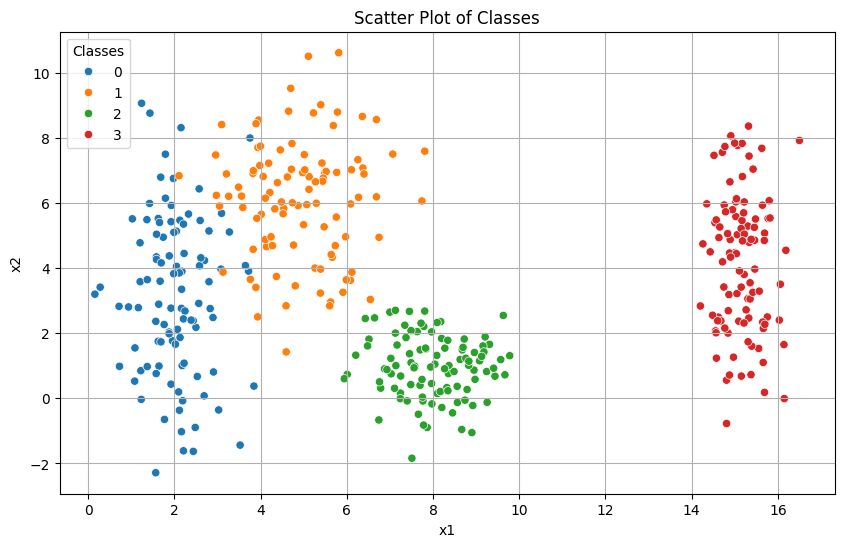

In [34]:
# Criar um grafico de dispersao
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="x1", y="x2", hue="classe", palette="tab10")
plt.title("Scatter Plot of Classes")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Classes")
plt.grid()
plt.show()


a) Observando o gráfico de dispersão, é possível notar que cada classe forma uma nuvem de pontos em torno de um centro. A Classe 0 está mais à esquerda, em torno do ponto (2,3), com uma grande variação no eixo vertical, o que faz com que alguns pontos fiquem bem mais altos ou mais baixos. A Classe 1 aparece mais à direita e acima da Classe 0, próxima de (5,6), também com uma variação considerável em y, de modo que há uma sobreposição entre as duas nas suas caudas. Já a Classe 2, em torno de (8,1), é mais compacta, concentrada próxima ao eixo horizontal inferior, mas fica relativamente próxima da Classe 1 em termos de x, o que pode causar confusão. Por fim, a Classe 3 está claramente separada das demais, centrada em (15,4), bem à direita no gráfico, com pouca chance de mistura com as outras.

b) Com base na inspeção visual, um limite simples e linear não seria suficiente para separar perfeitamente todas as classes. Isso porque as Classes 0 e 1 apresentam regiões de sobreposição devido à alta dispersão em y, e as Classes 1 e 2 estão próximas no eixo x, o que também dificulta a separação apenas com uma reta. Ainda assim, a Classe 3 poderia ser facilmente isolada das demais com uma linha vertical, já que está distante no eixo x. Portanto, embora algumas divisões lineares funcionem, não seria possível separar todas as classes com limites totalmente lineares.

c) Uma rede neural, por outro lado, teria a capacidade de aprender limites de decisão não lineares, que se adaptam melhor à distribuição dos pontos. Nesse caso, a rede poderia criar uma fronteira curva entre as Classes 0 e 1, de modo a contornar a dispersão vertical da Classe 0. Entre as Classes 1 e 2, o limite aprendido provavelmente teria uma forma diagonal ou levemente curvada, separando os pontos mais baixos da Classe 2 dos pontos mais altos da Classe 1. Já para a Classe 3, a rede tenderia a traçar uma fronteira quase vertical, isolando-a facilmente das demais classes. Dessa forma, os limites de decisão seriam mais adequados para lidar com as sobreposições e dispersões observadas no gráfico.

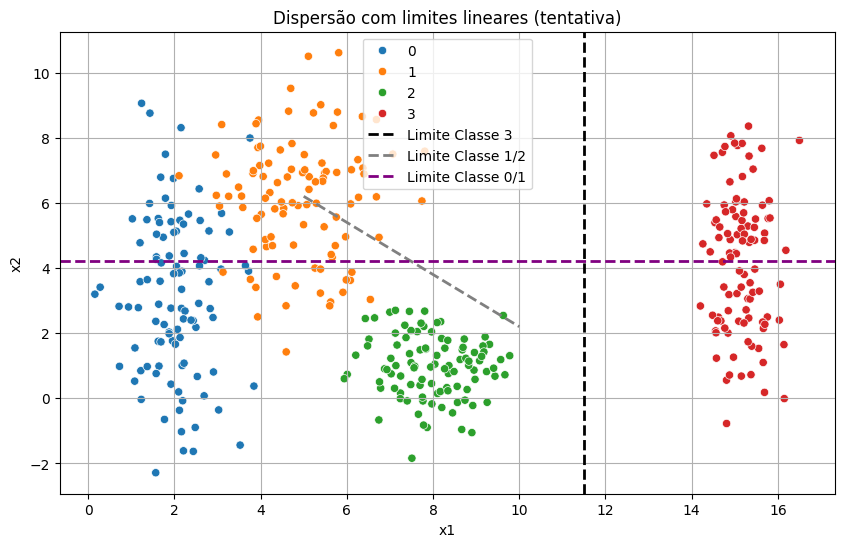

In [35]:
plt.figure(figsize=(10, 6))

# Dispersão das classes
sns.scatterplot(data=df, x="x1", y="x2", hue="classe", palette="tab10")

# Linha vertical para isolar Classe 3
plt.axvline(x=11.5, color="black", linestyle="--", linewidth=2, label="Limite Classe 3")

# Linha diagonal (aproxima separação Classe 1 e 2)
x_vals = np.linspace(5, 10, 100)
y_vals = -0.8 * (x_vals - 6.5) + 5   # ajuste manual
plt.plot(x_vals, y_vals, "--", color="gray", linewidth=2, label="Limite Classe 1/2")

# Linha horizontal (separação aproximada Classe 0/1)
plt.axhline(y=4.2, color="purple", linestyle="--", linewidth=2, label="Limite Classe 0/1")

plt.title("Dispersão com limites lineares (tentativa)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend()
plt.grid(); plt.show()


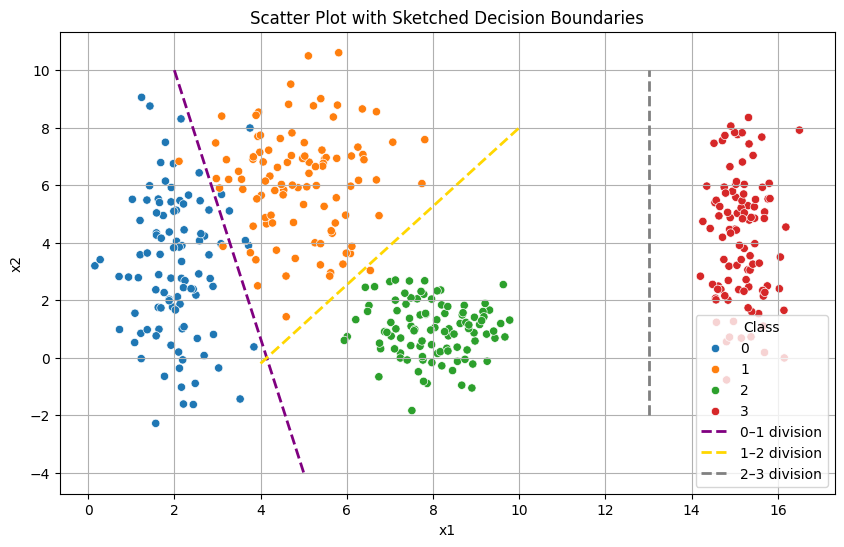

In [36]:
plt.figure(figsize=(10, 6))

# Scatter plot of the classes
sns.scatterplot(data=df, x="x1", y="x2", hue="classe", palette="tab10")

# Manually sketched straight lines (approximate coordinates)
line1_x = [2, 5]
line1_y = [10, -4]

line2_x = [4, 10]
line2_y = [-0.2, 8]

line3_x = [13, 13]
line3_y = [-2, 10]

# Plot the lines
plt.plot(line1_x, line1_y, color="purple", linewidth=2, linestyle="--", label="0–1 division")
plt.plot(line2_x, line2_y, color="gold", linewidth=2, linestyle="--", label="1–2 division")
plt.plot(line3_x, line3_y, color="gray", linewidth=2, linestyle="--", label="2–3 division")

# Styling
plt.title("Scatter Plot with Sketched Decision Boundaries")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Class", loc="lower right")
plt.grid(True)
plt.show()

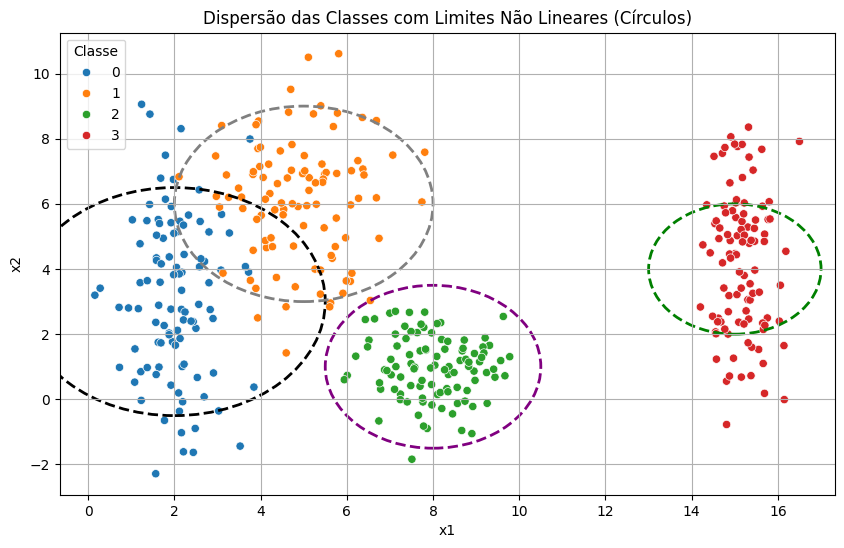

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Dispersão das classes
sns.scatterplot(data=df, x="x1", y="x2", hue="classe", palette="tab10")

# Desenhar círculos (center_x, center_y, raio)
circulos = [
    (2, 3, 3.5, "black"),   # ao redor da Classe 0
    (5, 6, 3.0, "gray"),    # ao redor da Classe 1
    (8, 1, 2.5, "purple"),  # ao redor da Classe 2
    (15, 4, 2.0, "green")   # ao redor da Classe 3
]

for cx, cy, r, cor in circulos:
    circ = plt.Circle((cx, cy), r, color=cor, fill=False, linestyle="--", linewidth=2)
    plt.gca().add_patch(circ)

plt.title("Dispersão das Classes com Limites Não Lineares (Círculos)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend(title="Classe")
plt.grid(); plt.show()


EXERCÍCIO 2
- Gerando Dados

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Parameters for Class A
mu_A = [0, 0, 0, 0, 0]
Sigma_A = [
    [1.0, 0.8, 0.1, 0.0, 0.0],
    [0.8, 1.0, 0.3, 0.0, 0.0],
    [0.1, 0.3, 1.0, 0.5, 0.0],
    [0.0, 0.0, 0.5, 1.0, 0.2],
    [0.0, 0.0, 0.0, 0.2, 1.0],
]

# Parameters for Class B
mu_B = [1.5, 1.5, 1.5, 1.5, 1.5]
Sigma_B = [
    [1.5, -0.7, 0.2, 0.0, 0.0],
    [-0.7, 1.5, 0.4, 0.0, 0.0],
    [0.2, 0.4, 1.6, 0.5, 0.0],
    [0.0, 0.0, 0.5, 1.5, 0.3],
    [0.0, 0.0, 0.0, 0.3, 1.5],
]

# Generate 500 samples for each class
XA = rng.multivariate_normal(mu_A, Sigma_A, size=500)
XB = rng.multivariate_normal(mu_B, Sigma_B, size=500)

# Merge into a single dataset
X = np.vstack([XA, XB])
y = np.array([0]*500 + [1]*500)  # 0 = Class A, 1 = Class B

# Create a DataFrame (Excel-style table)
cols = [f"f{i}" for i in range(1, 6)]
df = pd.DataFrame(X, columns=cols)
df["class"] = y

print(df.head())


         f1        f2        f3        f4        f5  class
0 -1.009577 -0.871865 -0.265805 -0.688982  0.162979      0
1  0.992288 -0.095176  1.621419  1.585731 -1.937140      0
2 -0.506238 -0.165444 -0.827131 -0.636480  0.172725      0
3  0.495002  0.979775  1.289676 -0.122559 -0.283103      0
4  0.187465 -0.395025 -0.060105 -0.806947  0.582734      0


In [39]:
# ===== Passo 3 =====
scaler = StandardScaler()
X_std = scaler.fit_transform(X)  # média 0, desvio 1 por coluna

In [40]:
# ===== Passo 4 =====
pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(X_std)  # Z: (1000, 2)

print("Variância explicada por PC1 e PC2:",
      np.round(pca.explained_variance_ratio_, 4))
print("Variância total explicada (PC1+PC2):",
      np.round(pca.explained_variance_ratio_.sum(), 4))


Variância explicada por PC1 e PC2: [0.5166 0.1599]
Variância total explicada (PC1+PC2): 0.6766


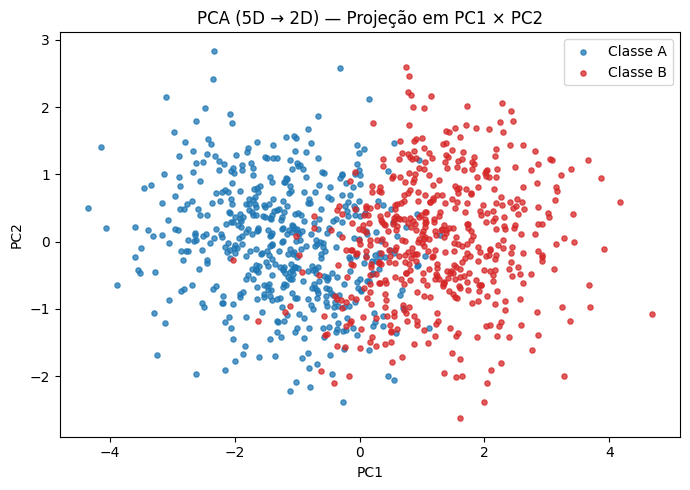

In [41]:
# ===== Passo 5 =====
cores = {0: "#1f77b4", 1: "#d62728"}  # azul=A, vermelho=B
labels = {0: "Classe A", 1: "Classe B"}

plt.figure(figsize=(7,5))
for c in (0, 1):
    m = (y == c)
    plt.scatter(Z[m,0], Z[m,1], s=14, alpha=0.75, label=labels[c], c=cores[c])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (5D → 2D) — Projeção em PC1 × PC2")
plt.legend()
plt.tight_layout()
plt.show()


Explained variance by PC1 and PC2: [0.5166 0.1599]
Total variance explained (PC1+PC2): 0.6766


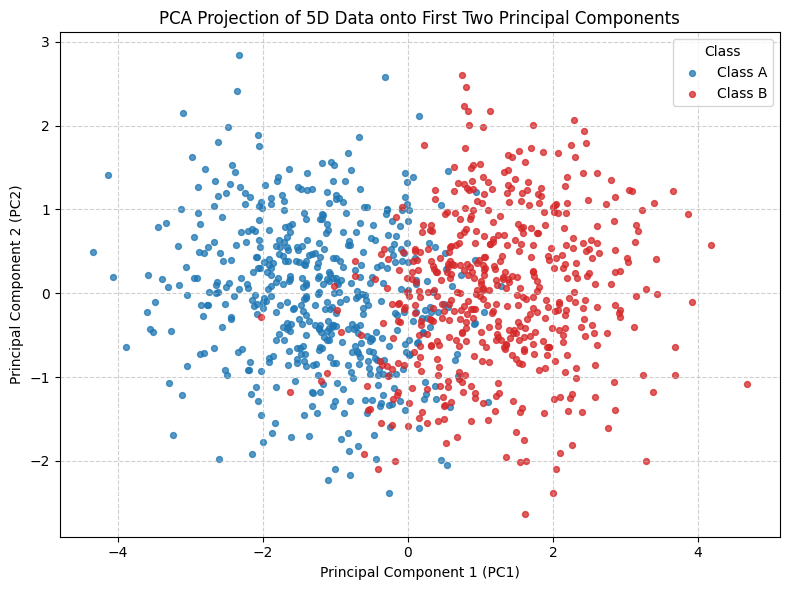

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1 — Standardize features (mean = 0, std = 1 per column)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 2 — PCA projection to 2 dimensions
pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(X_std)

print("Explained variance by PC1 and PC2:",
      np.round(pca.explained_variance_ratio_, 4))
print("Total variance explained (PC1+PC2):",
      np.round(pca.explained_variance_ratio_.sum(), 4))

# Step 3 — Scatter plot of projected data
colors = {0: "#1f77b4", 1: "#d62728"}  # Blue = Class A, Red = Class B
labels = {0: "Class A", 1: "Class B"}

plt.figure(figsize=(8, 6))
for c in (0, 1):
    mask = (y == c)
    plt.scatter(Z[mask, 0], Z[mask, 1],
                s=18, alpha=0.75,
                label=labels[c],
                c=colors[c])
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Projection of 5D Data onto First Two Principal Components")
plt.legend(title="Class")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

1. Relação entre as duas classes na projeção 2D
Na projeção em duas dimensões pelo PCA, as classes A (azul) e B (vermelha) aparecem com centros relativamente distintos, mas ainda existe uma zona de sobreposição significativa no meio do gráfico. A Classe A tende a se concentrar mais à esquerda do eixo PC1, enquanto a Classe B fica mais à direita. Mesmo assim, os pontos não formam agrupamentos totalmente isolados: há uma faixa central onde as duas distribuições se misturam, mostrando que, apesar de existirem padrões de separação, não há uma divisão perfeita no plano.

2. Separabilidade linear e desafios para modelos simples
A partir dessa projeção, é possível perceber que uma reta (limite linear) poderia separar uma boa parte dos pontos — por exemplo, traçando uma fronteira vertical em torno do PC1 = 0. No entanto, essa linha não conseguiria separar todas as amostras corretamente, porque várias instâncias das duas classes se sobrepõem na região central. Isso significa que os dados não são perfeitamente linearmente separáveis.

Esse tipo de estrutura representa um desafio para modelos lineares simples, como um Perceptron ou uma Regressão Logística, porque eles só conseguem aprender limites de decisão retos (hiperplanos). Como os dados possuem regiões de mistura e padrões mais complexos, um modelo linear tende a errar nos pontos da fronteira. Para lidar melhor com essa situação, seria necessário utilizar uma rede neural de múltiplas camadas, equipada com funções de ativação não lineares. Essas redes têm a capacidade de aprender limites de decisão curvos ou mais complexos, adaptando-se às regiões de sobreposição e permitindo uma separação mais precisa entre as classes.

EXERCÍCIO 3


In [43]:
df = pd.read_csv('spaceship-titanic/train.csv')
print(df.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


Features principais

Numéricas:

Age (idade do passageiro).

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck → gastos em diferentes áreas.

Categóricas:

HomePlanet (planeta de origem).

CryoSleep (se estava em criogenia).

Cabin (número/quarto na nave).

Destination (destino final planejado).

VIP (se era passageiro VIP).

Name (nome do passageiro, geralmente não usado diretamente no modelo).

Variável alvo

Transported → True ou False. Essa é a saída que a rede neural deverá aprender a prever.

In [44]:
# 1) Contar valores nulos por coluna
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


[NUM] Age: filled NaNs with median = 27.0
[NUM] RoomService: filled NaNs with median = 0.0
[NUM] FoodCourt: filled NaNs with median = 0.0
[NUM] ShoppingMall: filled NaNs with median = 0.0
[NUM] Spa: filled NaNs with median = 0.0
[NUM] VRDeck: filled NaNs with median = 0.0
[CAT] HomePlanet: NaNs before=201 -> after=0 (mode)
[CAT] CryoSleep: NaNs before=217 -> after=0 (mode)
[CAT] Destination: NaNs before=182 -> after=0 (mode)
[CAT] VIP: NaNs before=203 -> after=0 (mode)
[CAT] Name: NaNs before=200 -> after=0 (mode)
[CABIN] Deck: NaNs before=199 -> after=0 (mode)
[CABIN] Side: NaNs before=199 -> after=0 (mode)
[CABIN] CabinNum: NaNs before=199 -> after=0 (mode=82)
[CHECK] Total NaNs after imputation: 0
[CHECK] Non-numeric columns remaining after encoding: []
[NORM] Age: min/max before=(0.0000, 79.0000) -> scaled to [-1, 1]
[NORM] CabinNum: min/max before=(0.0000, 1894.0000) -> scaled to [-1, 1]
[NORM] RoomService: min/max before=(0.0000, 14327.0000) -> scaled to [-1, 1]
[NORM] FoodCourt:

C:\Users\Mateus Marinhero\AppData\Local\Temp\ipykernel_5404\3661719634.py:46: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.fillna(mode_vals.iloc[0])


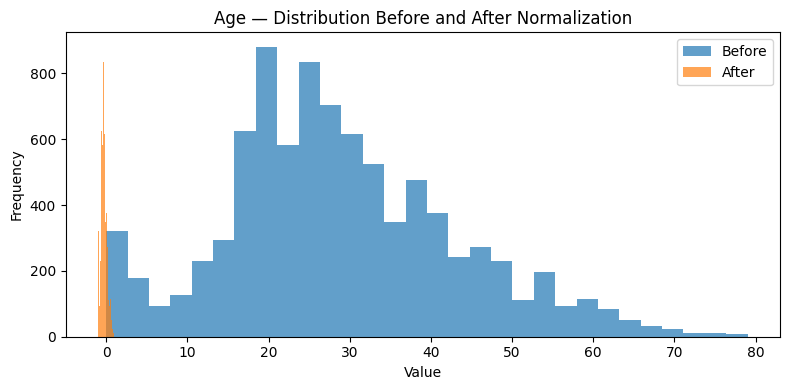

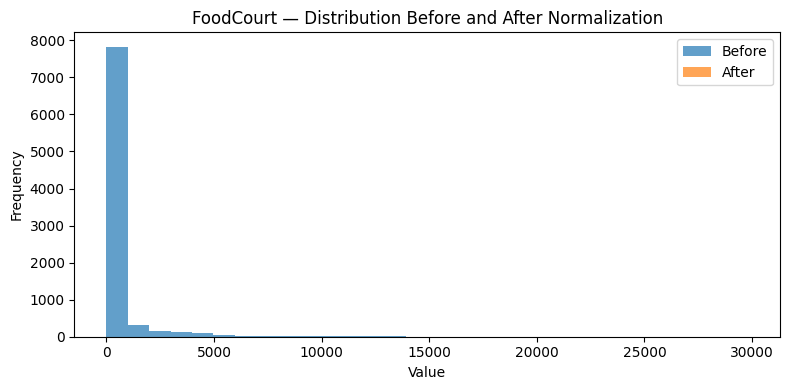

In [2]:
"""
Exercise 3 — Full Preprocessing Script (Spaceship Titanic)
- Handles missing values
- Splits Cabin into Deck / CabinNum / Side and imputes each with mode
- One-hot encodes categorical features
- Normalizes numerical features to [-1, 1] (NumPy implementation)
- Plots histograms (before vs after) for Age and FoodCourt

Run in a folder that contains 'train.csv' from the Kaggle Spaceship Titanic dataset.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List


# -------------------------
# 0) Load
# -------------------------
df = pd.read_csv("spaceship-titanic/train.csv")

# Keep target
y = df["Transported"].astype(bool)


# -------------------------
# 1) Handle Missing Values
# -------------------------

# 1.1 Define groups
num_cols: List[str] = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
# We'll treat Cabin separately by splitting, then impute parts with mode
cat_cols_base: List[str] = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Name", "Cabin"]

# 1.2 Split Cabin -> Deck / CabinNum / Side
cabin_split = df["Cabin"].astype("string").str.split("/", expand=True)
df["Deck"] = cabin_split[0]
df["CabinNum"] = pd.to_numeric(cabin_split[1], errors="coerce")
df["Side"] = cabin_split[2]

# Helper: mode imputation with fallback
def impute_mode(series: pd.Series, fallback="Unknown") -> pd.Series:
    mode_vals = series.mode(dropna=True)
    if len(mode_vals) > 0:
        return series.fillna(mode_vals.iloc[0])
    return series.fillna(fallback)

# 1.3 Numeric -> median (robust to outliers)
df_num = df.copy()
for col in num_cols:
    med = df_num[col].median()
    df_num[col] = df_num[col].fillna(med)
    print(f"[NUM] {col}: filled NaNs with median = {med}")

# 1.4 Base categoricals -> mode
df_cat = df_num.copy()
for col in ["HomePlanet", "CryoSleep", "Destination", "VIP", "Name"]:
    before = df_cat[col].isna().sum()
    df_cat[col] = impute_mode(df_cat[col])
    after = df_cat[col].isna().sum()
    print(f"[CAT] {col}: NaNs before={before} -> after={after} (mode)")

# 1.5 Cabin parts -> mode for all three (Deck, CabinNum, Side) as requested
for col in ["Deck", "Side"]:
    before = df_cat[col].isna().sum()
    df_cat[col] = impute_mode(df_cat[col], fallback="U")
    after = df_cat[col].isna().sum()
    print(f"[CABIN] {col}: NaNs before={before} -> after={after} (mode)")

# CabinNum is numeric, but per request we also impute with mode
if df_cat["CabinNum"].isna().any():
    cab_mode_series = df_cat["CabinNum"].mode(dropna=True)
    if len(cab_mode_series) > 0:
        cab_fill = cab_mode_series.iloc[0]
    else:
        cab_fill = 0  # extreme fallback
    before = df_cat["CabinNum"].isna().sum()
    df_cat["CabinNum"] = df_cat["CabinNum"].fillna(cab_fill)
    after = df_cat["CabinNum"].isna().sum()
    print(f"[CABIN] CabinNum: NaNs before={before} -> after={after} (mode={cab_fill})")

# 1.6 Drop columns that won't help modeling
# PassengerId: identifier; Name: high-cardinality text; Cabin: raw string replaced by parts
df_imputed = df_cat.drop(columns=["PassengerId", "Name", "Cabin"])

# Sanity check: no NaNs should remain
total_nans_after_impute = int(df_imputed.isna().sum().sum())
print(f"[CHECK] Total NaNs after imputation: {total_nans_after_impute}")
assert total_nans_after_impute == 0, "There are still NaNs after imputation!"


# -------------------------
# 2) One-Hot Encoding
# -------------------------
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck", "Side"]
df_encoded = pd.get_dummies(df_imputed, columns=categorical_cols, drop_first=False)

# Verify no object/string columns remain
non_numeric_after_encoding = df_encoded.select_dtypes(include=["object", "string"]).columns.tolist()
print(f"[CHECK] Non-numeric columns remaining after encoding: {non_numeric_after_encoding}")
assert len(non_numeric_after_encoding) == 0, "Some categorical columns were not encoded!"


# -------------------------
# 3) Normalization to [-1, 1] (NumPy formula)
# -------------------------
numeric_cols_to_scale: List[str] = ["Age", "CabinNum", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Keep copies for "before" histograms
age_before = df_encoded["Age"].copy()
food_before = df_encoded["FoodCourt"].copy()

df_normalized = df_encoded.copy()
for col in numeric_cols_to_scale:
    col_min = df_normalized[col].min()
    col_max = df_normalized[col].max()
    # Avoid divide-by-zero if constant
    if col_max == col_min:
        df_normalized[col] = 0.0
        print(f"[NORM] {col}: constant column -> set to 0.0")
    else:
        df_normalized[col] = 2 * (df_normalized[col] - col_min) / (col_max - col_min) - 1
        print(f"[NORM] {col}: min/max before=({col_min:.4f}, {col_max:.4f}) -> scaled to [-1, 1]")

# Sanity check ranges
mins = df_normalized[numeric_cols_to_scale].min()
maxs = df_normalized[numeric_cols_to_scale].max()
print("[CHECK] Min after normalization:\n", mins)
print("[CHECK] Max after normalization:\n", maxs)
assert (mins >= -1 - 1e-9).all() and (maxs <= 1 + 1e-9).all(), "Values out of [-1, 1] range!"

print(f"[FINAL] X shape: {df_normalized.shape} | y shape: {y.shape}")


# -------------------------
# 4) Histograms (before vs after) — Age & FoodCourt
# -------------------------
age_after = df_normalized["Age"].copy()
food_after = df_normalized["FoodCourt"].copy()

plt.figure(figsize=(8, 4))
plt.hist(age_before, bins=30, alpha=0.7, label="Before")
plt.hist(age_after,  bins=30, alpha=0.7, label="After")
plt.title("Age — Distribution Before and After Normalization")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(food_before, bins=30, alpha=0.7, label="Before")
plt.hist(food_after,  bins=30, alpha=0.7, label="After")
plt.title("FoodCourt — Distribution Before and After Normalization")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# 5) Final Notes
# -------------------------
# - df_normalized: fully preprocessed feature matrix (numeric + one-hot),
#                  numeric columns normalized to [-1, 1]
# - y: Boolean target (Transported)
# You can now feed (df_normalized, y) to a tanh-based neural network.


C:\Users\Mateus Marinhero\AppData\Local\Temp\ipykernel_5404\3738095622.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend(frameon=False, loc="upper right")
C:\Users\Mateus Marinhero\AppData\Local\Temp\ipykernel_5404\3738095622.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(frameon=False, loc="upper right")


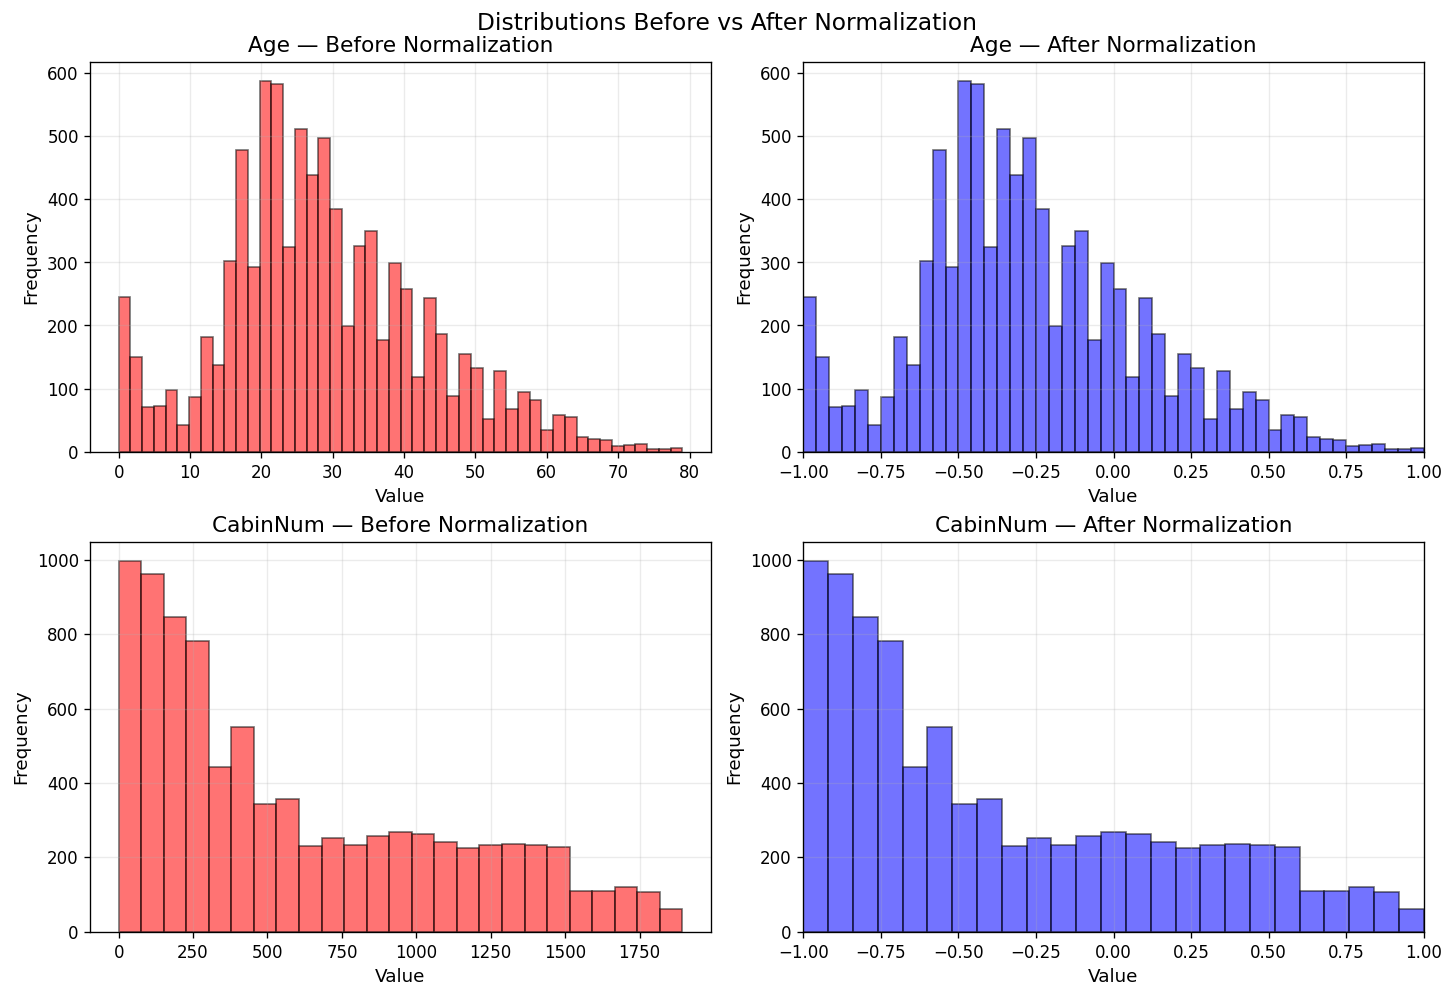

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- Styling (optional) ----------------------
plt.rcParams.update({
    "figure.dpi": 120,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10
})

# ---------------------- Binning helper -------------------------
def fd_bins(x, max_bins=80):
    """Freedman–Diaconis rule for robust bin width; cap the max number of bins."""
    x = np.asarray(x)
    x = x[~np.isnan(x)]
    if x.size < 2:
        return 10
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    if iqr == 0:
        return min(max_bins, 30)
    bin_width = 2 * iqr / (x.size ** (1/3))
    if bin_width <= 0:
        return min(max_bins, 30)
    bins = int(np.ceil((x.max() - x.min()) / bin_width))
    return max(10, min(bins, max_bins))

# ---------------------- Plotting helper ------------------------
def plot_before_after_separate(
    df_before, df_after, feature, axs, 
    xlim_after=None,
    color_before="#1f77b4",   # blue
    color_after="#d62728",    # red
    edgecolor="black"
):
    """Plot BEFORE on axs[0] and AFTER on axs[1] with polished styling."""
    x_before = df_before[feature].to_numpy()
    x_after  = df_after[feature].to_numpy()

    bins_before = fd_bins(x_before)
    bins_after  = fd_bins(x_after)

    # BEFORE
    axs[0].hist(x_before, bins=bins_before, alpha=0.55, color=color_before, edgecolor=edgecolor)
    axs[0].set_title(f"{feature} — Before Normalization")
    axs[0].set_xlabel("Value")
    axs[0].set_ylabel("Frequency")
    axs[0].legend(frameon=False, loc="upper right")

    # AFTER
    axs[1].hist(x_after, bins=bins_after, alpha=0.55, color=color_after, edgecolor=edgecolor)
    axs[1].set_title(f"{feature} — After Normalization")
    axs[1].set_xlabel("Value")
    axs[1].set_ylabel("Frequency")
    if xlim_after is not None:
        axs[1].set_xlim(xlim_after)
    axs[1].legend(frameon=False, loc="upper right")


# ================== Your plots (Age + CabinNum) ==================
fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

plot_before_after_separate(
    df_before=df_encoded,
    df_after=df_normalized,
    feature="Age",
    axs=axes[0],
    xlim_after=(-1, 1),
    color_before="red",   # BEFORE = blue
    color_after="blue"     # AFTER  = orange
)

plot_before_after_separate(
    df_before=df_encoded,
    df_after=df_normalized,
    feature="CabinNum",
    axs=axes[1],
    xlim_after=(-1, 1),
    color_before="red",   # BEFORE = blue
    color_after="blue"     # AFTER  = orange
)

fig.suptitle("Distributions Before vs After Normalization", fontsize=14, y=1.02)
plt.savefig("histograms_age_cabinnum_before_after_polished.png", dpi=200, bbox_inches="tight")
plt.show()


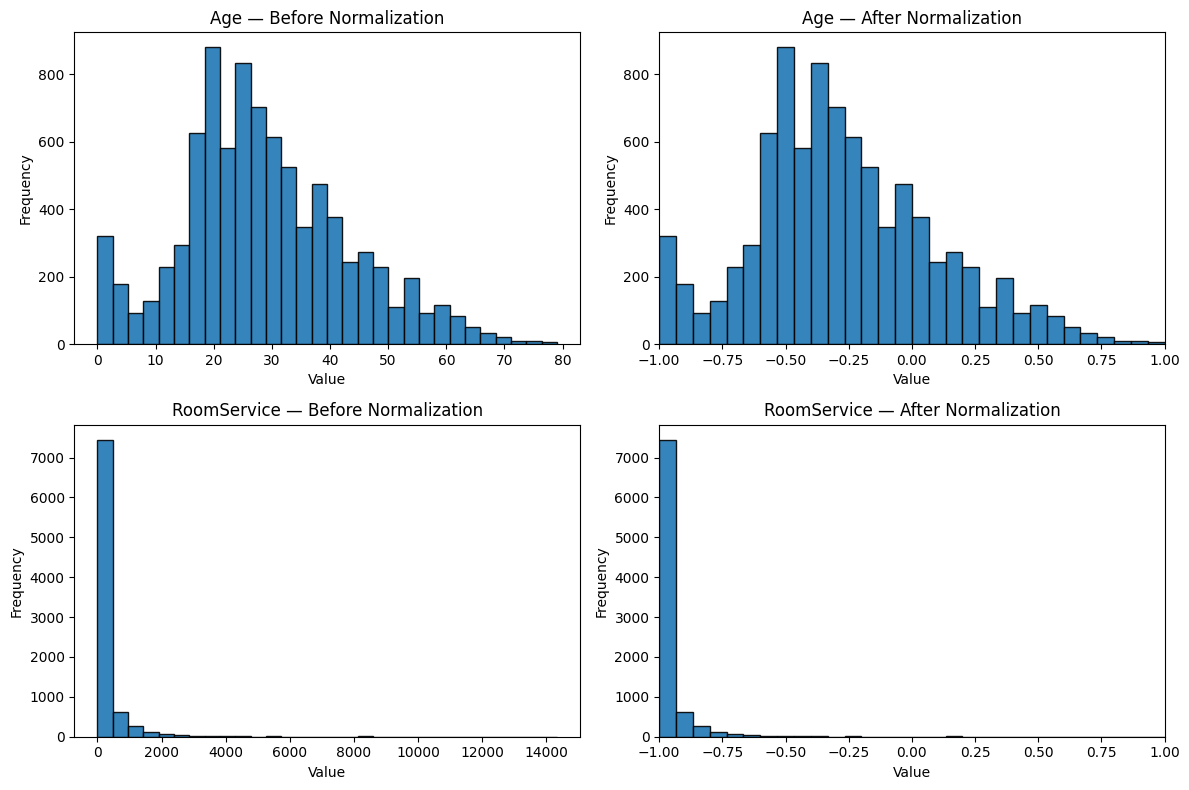

In [7]:
import matplotlib.pyplot as plt

# Criação da figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# ==== AGE ====
axes[0, 0].hist(df_encoded["Age"], bins=30, alpha=0.9, edgecolor="black")
axes[0, 0].set_title("Age — Before Normalization")
axes[0, 0].set_xlabel("Value")
axes[0, 0].set_ylabel("Frequency")

axes[0, 1].hist(df_normalized["Age"], bins=30, alpha=0.9, edgecolor="black")
axes[0, 1].set_title("Age — After Normalization")
axes[0, 1].set_xlabel("Value")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_xlim(-1, 1)

# ==== ROOMSERVICE ====
axes[1, 0].hist(df_encoded["RoomService"], bins=30, alpha=0.9, edgecolor="black")
axes[1, 0].set_title("RoomService — Before Normalization")
axes[1, 0].set_xlabel("Value")
axes[1, 0].set_ylabel("Frequency")

axes[1, 1].hist(df_normalized["RoomService"], bins=30, alpha=0.9, edgecolor="black")
axes[1, 1].set_title("RoomService — After Normalization")
axes[1, 1].set_xlabel("Value")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_xlim(-1, 1)

# Ajuste de layout
plt.tight_layout()
plt.savefig("histograms_age_roomservice_before_after.png", dpi=200)
plt.show()
